<a href="https://colab.research.google.com/github/yasmienAshraf/Schizophrenia-Disorder-using-HMM/blob/main/Schizophrenia_Disorder_HMMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Training of EEG Signals For Schizophrenia Disorder using HMM



# **<span style="color:#e76f51;"> # Goal</span>**
#### The goal of this Notebook is to develop a model to Classify individual Patient EEG Signals using Hidden Markov Model .


" Schizophrenia is a chronic mental illness that affects about 1% of people across the globe. One possible explanation for some of the symptoms of schizophrenia is that one or more problems with the corollary discharge process in the nervous system makes it difficult for patients to differentiate between internally and externally generated stimuli. Therefore, studying this process and its relationship to symptoms in the illness might allow us to better understand abnormal brain processes in patients with this diagnosis."

# **<span style="color:#e76f51;">Basic Lib Imports</span>**

In [ ]:
!pip install hmmlearn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report

# Fetch Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp "/content/drive/My Drive/processed_data.csv" "processed_data.csv"

In [ ]:
# Load the data
data = pd.read_csv("processed_data.csv") #EEG data
print(data.head(10))

        Fp2        F3            F4        C3            C4            P3  \
0  0.000010  0.000012 -7.947112e-06  0.000010 -5.653536e-06  4.591105e-06   
1  0.000008  0.000010 -7.794207e-06  0.000009 -5.653536e-06  2.450434e-06   
2  0.000002  0.000008 -6.876776e-06  0.000008 -4.277390e-06  2.144624e-06   
3  0.000002  0.000008 -7.794207e-06  0.000007 -4.889010e-06  1.227193e-06   
4  0.000010  0.000008 -3.054149e-06  0.000005 -1.830909e-06 -1.066383e-06   
5  0.000013  0.000010 -3.018576e-07  0.000005  3.097627e-07 -1.219288e-06   
6  0.000019  0.000011  2.756244e-06  0.000003  1.227193e-06 -3.512864e-06   
7  0.000022  0.000015  3.520770e-06  0.000005  1.074288e-06 -9.134780e-07   
8  0.000015  0.000015 -1.830909e-06  0.000006 -1.983814e-06 -6.076678e-07   
9  0.000017  0.000012 -3.818675e-06  0.000004 -3.207054e-06 -9.134780e-07   

             P4        O1        O2        F7            F8            T3  \
0 -3.971580e-06 -0.000003 -0.000008  0.000012 -4.736105e-06  4.438200e-06  

In [ ]:
print(data['label'].unique())
data.label.value_counts()

[0 1]


,count
label,
1,3958250
0,3257500


In [ ]:
data_0 = data[data['label'] == 0]  # Group for label 0 (healthy)
data_1 = data[data['label'] == 1]  # Group for label 1 (schizophrenia)

# detect the minimum number of label
min_samples = min(len(data_0), len(data_1))

# Resample both with an equal number of samples
data_0_balanced = resample(data_0, replace=False, n_samples=min_samples, random_state=42)
data_1_balanced = resample(data_1, replace=False, n_samples=min_samples, random_state=42)

# Combine the balanced data
balanced_data = pd.concat([data_0_balanced, data_1_balanced])
balanced_data.reset_index(drop=True,inplace=True)

# Check the distribution of the label after balancing
print(balanced_data['label'].value_counts())

# we take a sample of 100,000 rows from the balanced data
sample_data = balanced_data.sample(n=100000, random_state=42)
sample_data.reset_index(drop=True,inplace=True)

label
0    3257500
1    3257500
Name: count, dtype: int64


In [ ]:
sample_data

,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,F7,F8,T3,T4,T5,T6,Fz,Cz,Pz,Fp1,label
0,1.150674e-08,1.752981e-05,1.913983e-05,1.484645e-05,1.949761e-05,1.466755e-05,1.735092e-05,2.021317e-05,2.253875e-05,2.647435e-05,2.808437e-05,1.788759e-05,1.913983e-05,1.806648e-05,1.896094e-05,1.842426e-05,1.556201e-05,1.842426e-05,2.862105e-05,1
1,1.150674e-08,-1.220741e-06,-3.667223e-06,2.500000e-09,3.519318e-06,2.296077e-06,2.296077e-06,8.718093e-06,2.296077e-06,-7.620257e-07,-5.960800e-06,-2.291077e-06,-1.679456e-06,9.199308e-07,-3.820128e-06,-3.973033e-06,-1.526551e-06,2.296077e-06,-4.125939e-06,1
2,1.150674e-08,-3.208508e-06,3.083103e-07,2.143172e-06,-9.149308e-07,6.424516e-06,-7.620257e-07,8.870998e-06,6.577421e-06,5.965800e-06,1.880983e-05,1.225741e-06,5.965800e-06,7.189041e-06,3.519318e-06,-3.820128e-06,-1.373646e-06,1.225741e-06,6.118705e-06,0
3,1.150674e-08,-1.500000e-09,-1.500000e-09,-1.500000e-09,-1.500000e-09,-1.500000e-09,-1.500000e-09,-1.500000e-09,-1.500000e-09,-1.500000e-09,-1.500000e-09,-1.500000e-09,-1.500000e-09,-1.500000e-09,-1.500000e-09,-1.500000e-09,-1.500000e-09,-1.500000e-09,-1.500000e-09,1
4,1.150674e-08,2.507894e-05,1.837362e-06,1.147038e-05,-1.220741e-06,7.800662e-06,-2.902698e-06,-1.985267e-06,-1.070086e-05,6.192908e-05,-5.443173e-05,1.743369e-05,-2.155712e-05,-3.208508e-06,-1.712287e-05,1.544592e-05,1.040005e-05,2.907698e-06,4.419208e-05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2.064614e-05,4.626678e-07,4.896915e-06,-1.983814e-06,3.952544e-09,-2.136719e-06,1.838814e-06,7.684780e-07,6.425966e-06,9.484068e-06,1.315379e-05,1.991719e-06,7.496302e-06,3.062054e-06,6.884682e-06,3.826580e-06,4.626678e-07,-6.723871e-06,-5.658102e-10,0
99996,1.150674e-08,-3.667223e-06,-3.667223e-06,-4.431749e-06,-2.443982e-06,1.990267e-06,-2.443982e-06,5.507085e-06,-3.055603e-06,-3.667223e-06,-3.361413e-06,1.072836e-06,-1.008924e-05,3.213508e-06,-3.208508e-06,-3.361413e-06,-5.502085e-06,-2.138172e-06,-4.562154e-07,1
99997,1.150674e-08,1.531551e-06,4.612154e-07,2.143172e-06,1.378646e-06,-7.620257e-07,1.684456e-06,-3.514318e-06,-1.679456e-06,-6.725326e-06,2.500000e-09,1.225741e-06,-1.067836e-06,-7.620257e-07,-2.749792e-06,1.531551e-06,2.754792e-06,-6.091205e-07,-2.138172e-06,0
99998,1.150674e-08,-1.079395e-05,-8.947360e-06,-6.816679e-06,-3.407590e-06,3.552635e-06,1.990136e-06,9.660587e-06,7.245815e-06,-1.136213e-05,-8.379178e-06,-2.981453e-06,-1.134863e-06,1.990136e-06,7.117270e-07,-9.231451e-06,-7.810997e-06,2.700363e-06,-1.704395e-05,0


In [ ]:
from sklearn.model_selection import train_test_split

X = sample_data.drop(columns=['label'])  # Features
y = sample_data['label']  # Labels (0 for healthy, 1 for schizophrenia)

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Check the shape of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (80000, 19)
X_test shape: (20000, 19)
y_train shape: (80000,)
y_test shape: (20000,)


# HMM MODEL

In [ ]:
# Initialize the HMM model
model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=100)
model.fit(X_train)
hidden_states = model.predict(X_test)

accuracy = accuracy_score(y_test, hidden_states)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, hidden_states))

print("Confusion Matrix:")
print(confusion_matrix(y_test, hidden_states))


Accuracy: 0.52595
              precision    recall  f1-score   support

           0       0.51      0.98      0.67      9864
           1       0.79      0.09      0.16     10136

    accuracy                           0.53     20000
   macro avg       0.65      0.53      0.41     20000
weighted avg       0.65      0.53      0.41     20000

Confusion Matrix:
[[9626  238]
 [9243  893]]


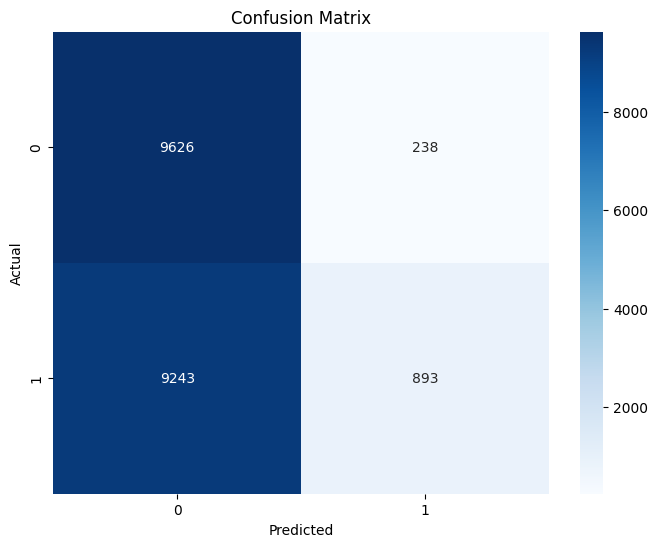

In [ ]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, hidden_states)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Finish :)